# <b>Predicting Insurance Charges Model

### <b>Problem Statement:</b>
In the health insurance industry, accurately estimating the medical charges of individuals is crucial for pricing insurance plans.The goal of this project is to build a predictive model that can estimate a person’s insurance charges based on features like age, BMI, smoking status, number of children, and region. By analyzing these factors, we aim to uncover patterns and relationships that influence healthcare costs.

In [72]:
#importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#reading the dataset
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
#to view the shape 
print(df_insurance.shape)
#to see the coloumns in the dataset
print(df_insurance.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


- This dataset has total 7 coloumns which are 'Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', and 'Charges'.
- This dataset contains 1338 rows.

In [75]:
#to check for missing value
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- From using the info(),We can see that there are no missing values or null values.
- The data type shows us that 'sex','smoker' and 'region' are categorical and rest other are numerical.

In [76]:
#to know the statistical summary of the dataset
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- We can infer the following:
  * The average age of the individuals in the dataset is 39.20 years with maximum age as 64 and minimum age as 18.
  * The average BMI of the individuals in the dataset is 30.66 with maximum BMI as 53.13 and minimum BMI as 15.96.
  * charges have a average of 13270.42 with maximum charges as 63770 and minimum charges as 1121.87.

In [77]:
df_insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

- There are 676 male and 662 female individuals in the dataset.

In [78]:
df_insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

- We can see that there are four regions in the dataset: southwest, southeast, northwest, and northeast with counts 364,325,325 and 324

In [79]:
df_insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

- We can see that there are 1064 no-smokers and 274 smokers in the dataset.

#### <b>Visualizing the Numerical Data

In [80]:
df_insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [81]:
#lets check the distribution of the target variable 'charges'
fig = px.histogram(df_insurance, x='charges', title='Distribution of Charges', marginal='box',template='plotly_white',color_discrete_sequence=["#FF4D4D"])
fig.update_layout(bargap=0.1)


The distribution of charges infer us:
- The charges are right-skewed as we can see the count of charges from 0 to 15k is more than the count of charges from 15k to 60k.
- There are many outliers in the dataset that may be due to other reasons like correlations with other parameter age,gender and bmi.

In [82]:
df_insurance['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [83]:
#lets check the distribution of the 'age' column
fig = px.histogram(df_insurance, x='age', nbins=47, title='Age Distribution', marginal='box',color_discrete_sequence=["#2B2E57"])
fig.update_layout(bargap=0.1)
fig.show()


We can infer the following:
- The age distribution is normal with most of the individuals being in the age group 20-64 years.
- There are individuals in the age group 18-20 years of count 166.

In [84]:
df_insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [85]:
#lets check the distribution of the 'BMI' column
fig = px.histogram(df_insurance, x='bmi', nbins=39, title='BMI Distribution', marginal='box', color_discrete_sequence=["#BBB631"])
fig.update_layout(bargap=0.1)


we can infer the following:
- Its a normal distribution curved.
- Most of the individuals having BMI between 25-35.


In [86]:
df_insurance['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [87]:
#lets check the distribution of the 'children' column
fig = px.histogram(df_insurance, x='children', title='Children Distribution', marginal='box', color_discrete_sequence=["#1F77B4"])
fig.update_layout(bargap=0.1)

We can infer the following:
- Most of the individuals have 0 children.
- There are 764 individuals with 1-5 childrens.

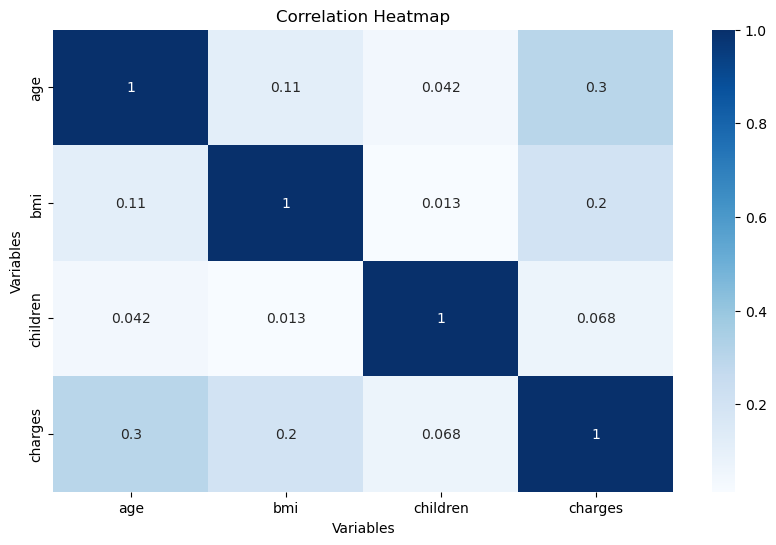

In [88]:
#creating a heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(10, 6))
numeric = ['age', 'bmi', 'children', 'charges']
sns.heatmap(df_insurance[numeric].corr(), annot=True, cmap='Blues')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Heatmap')
plt.show()


Infer the following:
- The 'age' and 'charges' have a positive correlation of 0.3.
- The 'bmi' also has a positive correlation of 0.35.
- So considering the correlation,we can consider these two variables(age and bmi) with respect to charges for building our predictive model.

#### <b>Visualizing the Categorical Data

In [89]:
df_insurance_n = df_insurance.copy()

In [90]:
#gender column
x={'male':1, 'female':0}
#created a new coloumn 'gender_status' to map the values of 'sex' coloumn
df_insurance_n['gender_num']=df_insurance_n['sex'].map(x)

In [91]:
df_insurance_n['gender_num'].describe()

count    1338.000000
mean        0.505232
std         0.500160
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender_num, dtype: float64

In [92]:
#lets check the distribution of the'smoker_status' column
fig = px.histogram(df_insurance_n, x='gender_num', title='Smoker Status Distribution', marginal='box',color_discrete_sequence=["#642E91"])
fig.update_layout(bargap=0.1)

We can infer the following:
- There are more males than females in the dataset.
- There are 676 males and 662 females in the dataset.

In [93]:
#smoker coloumn
x={'yes':1, 'no':0}
#created a new coloumn 'smoker_status' to map the values of 'smoker' coloumn
df_insurance_n['smoker_status']=df_insurance_n['smoker'].map(x)

In [94]:
df_insurance_n['smoker_status'].describe()

count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker_status, dtype: float64

In [95]:
#lets check the distribution of the'smoker_status' column
fig = px.histogram(df_insurance_n, x='smoker_status', title='Smoker Status Distribution',color_discrete_sequence=["#FF7F0E"],template='plotly_white',
                   labels={'smoker_status': 'Smoker Status'})
fig.update_layout(bargap=0.2)

We can infer the following:
- There are more non-smokers than smokers in the dataset.
- There are 1,064 non-smokers 
- There are 274 smokers

In [96]:
#using one-hot encoding for categorical variables 'region'
#import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

In [97]:
region_encoder = OneHotEncoder()
region_encoder.fit(df_insurance_n[['region']])
region_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [98]:
region_encoded = region_encoder.transform(df_insurance_n[['region']]).toarray() 

In [99]:
df_insurance_n[['region_northeast','region_northwest','region_southeast','region_southwest']] = region_encoded

In [100]:
df_insurance_n

,age,sex,bmi,children,smoker,region,charges,gender_num,smoker_status,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [101]:
#now lets see the distribution of the region columns
fig = px.histogram(df_insurance_n, x='region', title='Region Distribution', color='region',color_discrete_sequence=["#E91D14","#8FA445","#3A4966","#42854A"], template='plotly_white')
fig.update_layout(bargap=0.2)

We can infer the following:
- The distribution of southeast region has the highest count.

In [102]:
df_insurance_n.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'gender_num', 'smoker_status', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [103]:
df_insurance_n.head()


,age,sex,bmi,children,smoker,region,charges,gender_num,smoker_status,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


<Axes: >

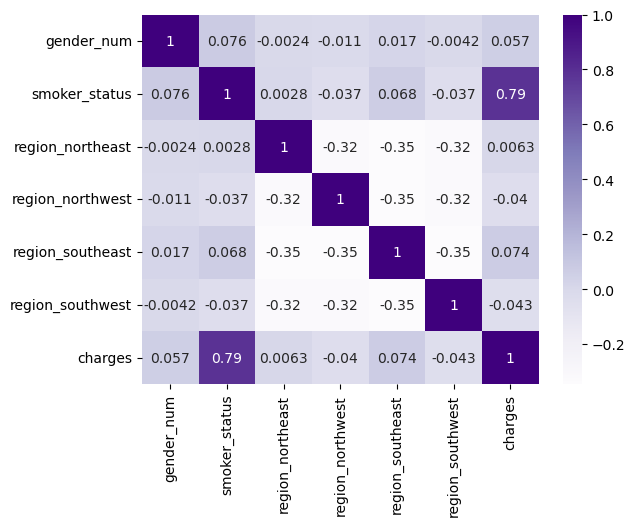

In [104]:
#correlation map for categorical variables
categorical = ['gender_num','smoker_status','region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest','charges']
sns.heatmap(df_insurance_n[categorical].corr(), annot=True, cmap='Purples')


We can infer the following:
- The 'smoker_status' has a positive correlation of 0.79 with 'charges'.
- We can consider this categorical variables(smoker_status) and numerical data(age and bmi) with respect to charges for building our predictive model.

#### <b>Visualizing the Relationship between Numerical and Categorical Variables

In [105]:
#age vs charges with smoker status
fig = px.scatter(df_insurance_n, x='age', y='charges', color='smoker', title='Age vs Charges by Smoker', 
                 color_discrete_sequence=['#636EFA', '#EF553B'],opacity=0.7,hover_data='sex')
fig.update_traces(marker_size=9)

We can infer that smokers have higher charges than non-smokers.But still its not clear from the scatter plot as it is cluttered. 

In [106]:
#non-smoker data
df_non_smoker = df_insurance_n[df_insurance_n['smoker'] == 'no']

#smoker data
df_smoker = df_insurance_n[df_insurance_n['smoker'] == 'yes']

In [107]:
df_non_smoker.head()

,age,sex,bmi,children,smoker,region,charges,gender_num,smoker_status,region_northeast,region_northwest,region_southeast,region_southwest
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0


In [108]:
df_smoker.head()

,age,sex,bmi,children,smoker,region,charges,gender_num,smoker_status,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,0,1,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,0,1,1.0,0.0,0.0,0.0


##### <b>Non-Smoker's distribution comparison

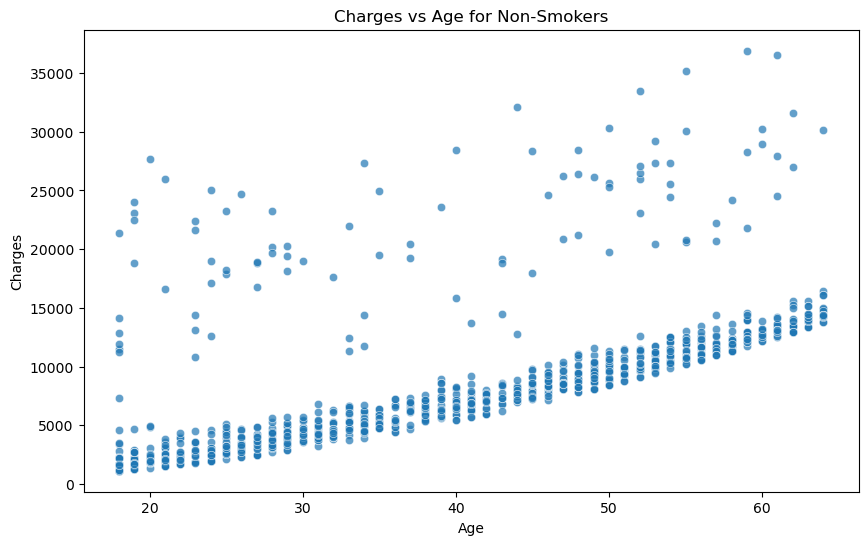

In [109]:
#Now let's visualize the distribution of charges with respect to age for non-smokers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_non_smoker, x='age', y='charges', alpha=0.7)
plt.title('Charges vs Age for Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


We can infer that non-smokers have lower charges compared to smokers.And some exceptions are observed where non-smokers have higher charges than smokers.But still its clear that it is showing a trend.

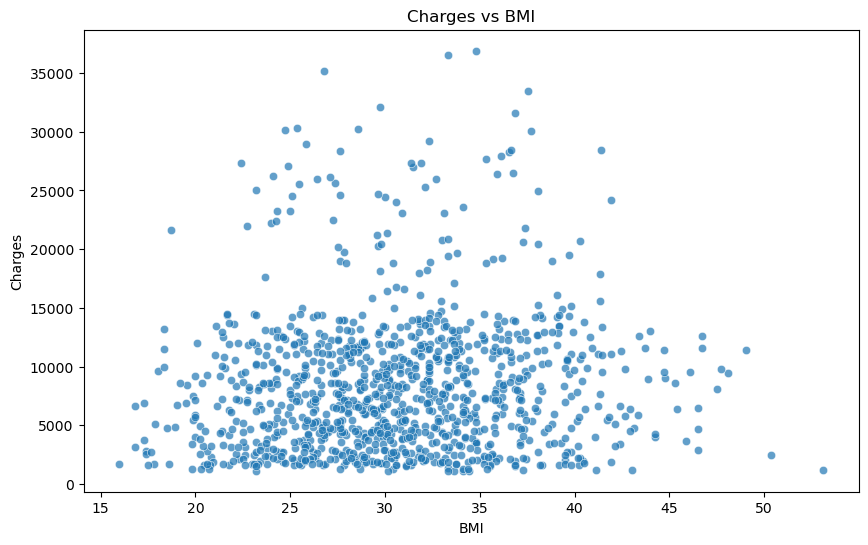

In [110]:
#lets check the distribution of the target variable 'charges' and 'BMI'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_non_smoker, x='bmi', y='charges', alpha=0.7)
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Above plot shows a positive correlation between charges and BMI.

In [111]:
#Now lets check the distribution of charges with respect to children for non-smokers
px.violin(df_non_smoker, x='children', y='charges', title='Charges vs Children for Non-Smokers',color='children')

In [112]:
#Now lets check the distribution of charges with respect to gender for smokers
px.violin(df_non_smoker, x='gender_num', y='charges', title='Charges vs Gender for Non-Smokers',color='gender_num')

We see that females have higher charges than males.But still not a huge difference is noticed.

In [113]:
#Now let's check the distribution of charges with respect to region for non-smokers
px.violin(df_non_smoker, x='region', y='charges', title='Charges vs Region for Non-Smokers',color='region')

Even here the charges are not significantly different in different regions.Are almost having the same distribution.

##### <b>Smoker's distribution comparison

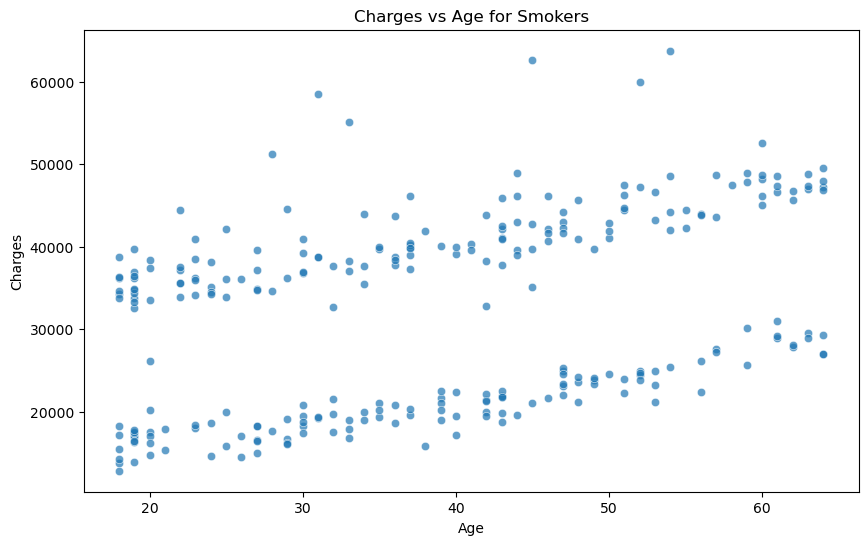

In [153]:
#lets check the distribution of charges with respect to age for smokers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_smoker, x='age', y='charges', alpha=0.7)
plt.title('Charges vs Age for Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

We can infer the following:
- Smokers have higher charges than non-smokers.
- There is a trend observed where increasing age, charges also increase.

In [155]:
#Now let's check the distribution of charges with respect to children for smokers
px.violin(df_smoker, x='children', y='charges', title='Charges vs Children for Smokers',color='children')

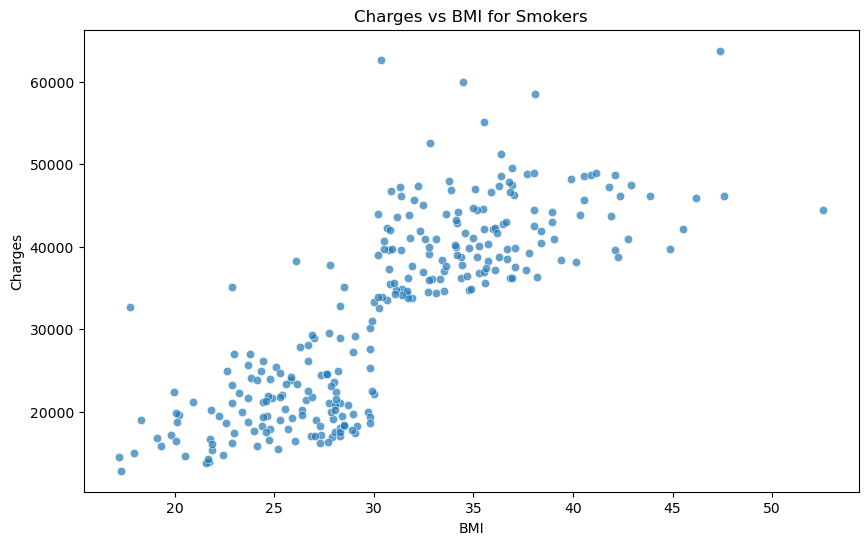

In [156]:
#Now let's visualize the distribution of charges with respect to bmi for smokers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_smoker, x='bmi', y='charges', alpha=0.7)
plt.title('Charges vs BMI for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

<b>In conclusion:</b>
- There are more non-smokers than smokers in the dataset.
- There are 274 smokers.
- The distribution of charges and BMI is almost the same for both non-smokers and smokers.
- Smokers have higher charges compared to non-smokers.
- The distribution of charges is highly correlated with age,Smoker status and bmi.

### <b>Model Building for Predicting Charges

In [114]:
#importing some needed library 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

##### <b>Splitting the Data for Training and Testing

In [115]:
df_non_smoker.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'gender_num', 'smoker_status', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [116]:
#taking some data to train and test the model for non-smokers
x_non_smoker = df_non_smoker[['age','gender_num','bmi','children','smoker_status']]
y_non_smoker = df_non_smoker['charges']
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_non_smoker, y_non_smoker, test_size=0.1, random_state=42)

In [117]:
x_train_n

,age,gender_num,bmi,children,smoker_status
282,30,1,27.645,1,0
517,45,1,30.495,2,0
844,53,1,30.495,0,0
596,42,0,29.480,2,0
1077,21,1,26.030,0,0
...,...,...,...,...,...
425,45,1,24.310,5,0
582,39,1,45.430,2,0
164,37,1,29.640,0,0
1315,18,1,28.310,1,0


In [118]:
print("Data to train the model : ",x_train_n.shape)
print("Data to test the model : ",x_test_n.shape)

Data to train the model :  (957, 5)
Data to test the model :  (107, 5)


In [119]:
#taking some data to train and test the model for smokers
x_smoker = df_smoker[['age','gender_num','bmi','children','smoker_status']]
y_smoker = df_smoker['charges']
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_smoker, y_smoker, test_size=0.2, random_state=42)

In [120]:
x_train_s

,age,gender_num,bmi,children,smoker_status
49,36,1,35.200,1,1
1278,39,1,29.925,1,1
609,30,1,37.800,2,1
128,32,0,17.765,2,1
883,51,0,37.050,3,1
...,...,...,...,...,...
954,34,1,27.835,1,1
298,31,1,34.390,3,1
503,19,1,30.250,0,1
1314,30,0,23.655,3,1


In [121]:
x_test_s

,age,gender_num,bmi,children,smoker_status
117,29,0,27.940,1,1
842,23,0,32.780,2,1
989,24,0,20.520,0,1
623,18,1,33.535,0,1
1304,42,1,24.605,2,1
1156,19,1,44.880,0,1
1284,61,1,36.300,1,1
1022,47,1,36.080,1,1
1274,26,1,27.060,0,1
1078,28,1,31.680,0,1


In [122]:
print("Data to train the model : ",x_train_s.shape)
print("Data to test the model : ",x_test_s.shape)

Data to train the model :  (219, 5)
Data to test the model :  (55, 5)


##### <B>Model Building

##### Non-Smokers

In [123]:
#for non-smokers
model_n = LinearRegression()
model_n.fit(x_train_n, y_train_n)

LinearRegression()

In [124]:
pred_n = model_n.predict(x_test_n)

##### Smokers

In [125]:
model_s = ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42)
model_s.fit(x_train_s, y_train_s)


ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42)

In [126]:
pred_s = model_s.predict(x_test_s)

#### <b>Evaluating the model

In [127]:
#for non-smokers
print("Non-Smoker R²:", r2_score(y_test_n, pred_n))
print("Non-Smoker RMSE:", root_mean_squared_error(y_test_n, pred_n))

Non-Smoker R²: 0.537924012395016
Non-Smoker RMSE: 3409.7009458239


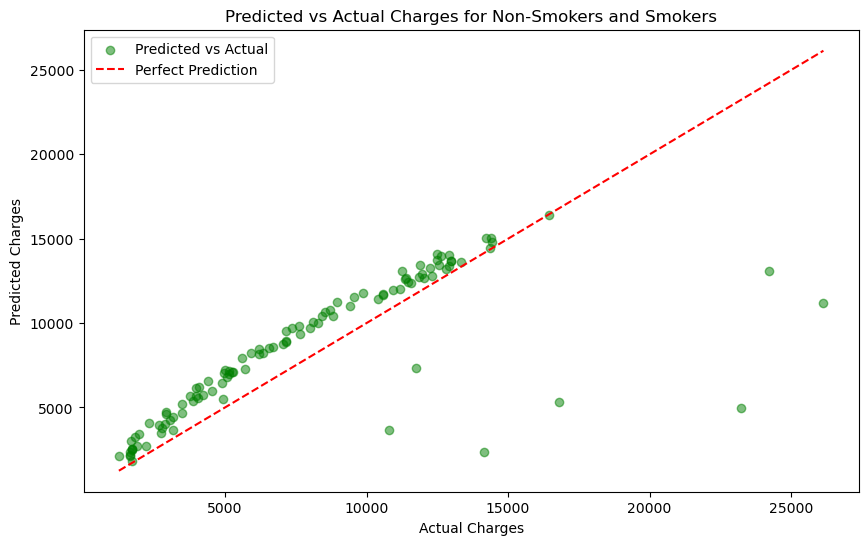

In [128]:
#plotting the predicted vs actual charges for both non-smokers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, pred_n, alpha=0.5, color='green', label='Predicted vs Actual')
plt.plot([y_test_n.min(), y_test_n.max()],[y_test_n.min(), y_test_n.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges for Non-Smokers and Smokers')
plt.legend()

In [129]:
#for smokers
print("Smoker R²:", r2_score(y_test_s, pred_s))
print("Smoker RMSE:", root_mean_squared_error(y_test_s, pred_s))

Smoker R²: 0.7011227911004789
Smoker RMSE: 6696.668327603127


We can tell that our model is performing well for non-smokers.

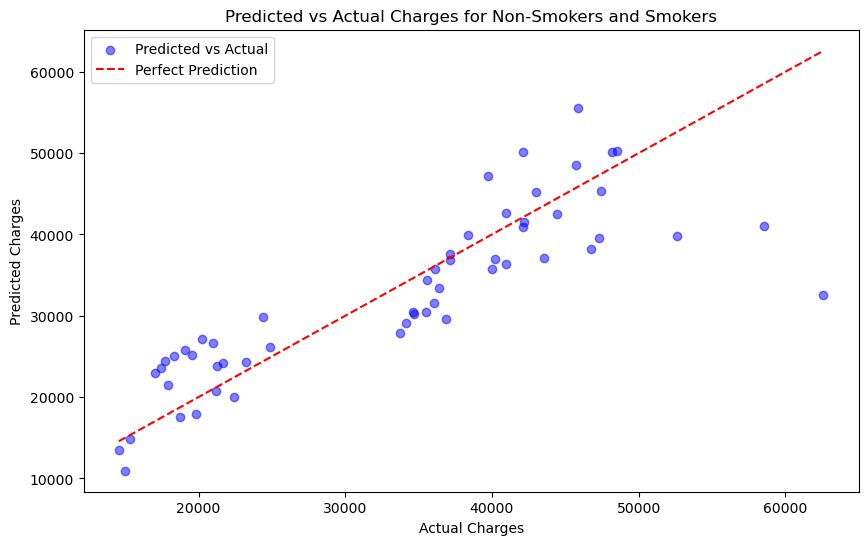

In [130]:
#plotting the predicted vs actual charges for smokers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_s, pred_s, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test_s.min(), y_test_s.max()],[y_test_s.min(), y_test_s.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges for Non-Smokers and Smokers')
plt.legend()

## <b>Model Building for Predicting Charges in Common Both Smokers and Non-Smokers

In [131]:
#taking some data to train and test the model in common both smokers and non-smokers
x_df_n = df_insurance_n[['age','gender_num','bmi','children','smoker_status']]
y_df_n = df_insurance_n['charges']
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_df_n, y_df_n, test_size=0.1, random_state=42)

In [132]:
x_test_p

,age,gender_num,bmi,children,smoker_status
764,45,0,25.175,2,0
887,36,0,30.020,0,0
890,64,0,26.885,0,1
1293,46,1,25.745,3,0
259,19,1,31.920,0,1
...,...,...,...,...,...
358,23,1,41.910,0,0
551,32,0,28.930,0,0
778,35,1,34.320,3,0
1127,35,0,35.860,2,0


In [133]:
model_p = LinearRegression()
model_p.fit(x_train_p, y_train_p)


LinearRegression()

In [134]:
pred_p = model_p.predict(x_test_p)

##### Evaluating the model

In [135]:
print("Smoker & Non-Smoker Combined R²:", r2_score(y_test_p, pred_p))
print("Smoker & Non-Smoker Combined RMSE:", root_mean_squared_error(y_test_p, pred_p))

Smoker & Non-Smoker Combined R²: 0.7622204758053099
Smoker & Non-Smoker Combined RMSE: 5727.385558374966


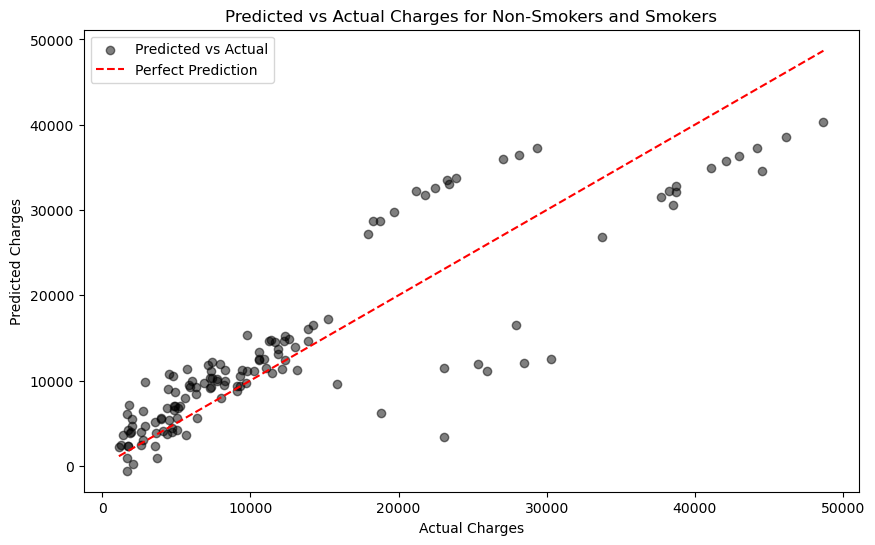

In [136]:
#plotting the predicted vs actual charges for both non-smokers and smokers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_p, pred_p, alpha=0.5, color='black', label='Predicted vs Actual')
plt.plot([y_test_p.min(), y_test_p.max()],[y_test_p.min(), y_test_p.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges for Non-Smokers and Smokers')
plt.legend()

### <b>User Prediction

In [149]:
def user_input_data():
    age = int(input('Enter Age:'))
    bmi = float(input('Enter BMI:'))
    gender=input('Enter Gender (male/female):')
    smoker = input('Are you a smoker? (yes/no):')
    children = int(input('Enter Number of Children:'))
    gender_num = 0 if gender == 'female' else 1
    smoker_status = 1 if smoker == 'yes' else 0
    return age,gender_num,bmi,children,smoker_status

In [ ]:
k = [age,gender_num,bmi,children,smoker_status] = user_input_data()
print("Predicted Charges for the User: ",int(model_p.predict([k])))

Predicted Charges for the User:  30564


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/var/folders/1g/_kvl5nb171n1w2h_6d34n67m0000gn/T/ipykernel_27512/1297958713.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



#### <b>Saving the model

In [157]:
import joblib as jb

In [159]:
jb.dump(model_p, 'insurance_model.pkl')

['insurance_model.pkl']